# Лабораторная работа 1
## Выполнила: Плохута-Плакутина Елизавета
# **Текст 11**

----------
# **Отчет:**
(Я давала комментарии в самом файле, сделаю краткий обзор)

Я начала с предобработки. Так как текст написан в дореволюционной орфографии, я привела его к современному виду. Также я удалила пунктуацию, переносы строк, ненужные пробелы и другие символы, а также лемматизировала его. Я провела частотный анализ, чтобы потом посмотреть, какие слова в какой части текста больше употребляются. Для этого я разделила текст на главы и при помощи графиков визуализировала частоты упоминания слов по главам (я брала имена собственные и другие важные для понимания текста слова).

Это точно роман, раз он разделен на главы, причем "сердце" входит в топ частотных слов, из этого у меня создается впечатление, что книга о любви. Есть несколько главных героев: копернаум, алексей иванович (его отчество стало понятно из топа биграммов), надя-полька, наташа (николаевна? - в биграммах вроде так). Есть несколько локаций: петербург, дача.

Еще у кого-то из них есть ребенок.


Я бы хотела получше проанализировать частотные слова по главам книги (все графики есть), но, к сожалению, не успеваю(((

Еще было бы хорошо проанализировать статистику по частям речи из таблички пандас, тоже не успеваю(((


Как выяснилось по триграммам, в тексте есть немецкий язык, их надо было бы отдельно выделить. Возможно, они появляются в каких-то письмах или внутренних диалогах. Тоже было бы интересно посмотреть

---------

Для начала откроем файл и посмотрим, сколько в нем слов:

In [179]:
with open('/content/11.txt', encoding='utf-8') as txt:
    text = txt.read()
    print('Количество слов в тексте:', len(text.split()))

Количество слов в тексте: 32663


Еще напечатаем первые и последние 1000 символов:

In [180]:
print(len(text))

221136


In [181]:
print(text[:1000])



Глава I.
ВСТУПИТЕЛЬНАЯ.

Начало трудно -- слышалъ я не разъ...
* * *

   Нѣсколько недѣль тому назадъ, одинъ гражданинъ Соединенныхъ Штатовъ, на собственной своей шкунѣ, отъ нечего дѣлать, направилъ путь изъ какого нибудь Коннектикута прямо въ Сѣверную Пальмиру. Въ тридцать-три дня окончилъ онъ свое путешествіе и бросилъ якорь противъ Англійской набережной. Напрасно спутники уговаривали его скорѣе выйти на берегъ и посмотрѣть хотя Невскій проспектъ. Угрюмый американецъ пообѣдалъ на своей шкунѣ, говоря, что въ Петербургѣ вѣрно нѣтъ хорошаго ростбифа, потомъ легъ спать и, выспавшись хорошенько, наконецъ пошолъ осматривать нашу столицу.
   Но не такъ дѣлаютъ петербургскіе фельетонисты. Одинъ изъ нихъ въ такихъ словахъ изливалъ дань удивленія "красавцу Петербургу", воротившись въ него послѣ двухнедѣльной поѣздки въ Финляндію, которая была для него чѣмъ-то въ родѣ Австраліи.
   "Послѣдняя картина. И стою на Исакіевскомъ мосту. Утро. Нева. Городъ спитъ. Заря на небѣ. Дивный видъ! Биржа. Ад

In [182]:
print(text[220000:])

ного. Когда я пріѣду въ Петербургъ, познакомьте меня со Скакуновымъ, у котораго такое отличное знакомство; и вѣдь коротко зналъ его покойнаго батюшку и его на рукахъ носилъ, когда ему было шесть мѣсяцевъ. А ужь насчотъ враговъ будьте покойны: и вамъ скажу словечко нашего незабвеннаго баснописца:
  
   Завистники, на что ни взглянуть,
             Поднимутъ страшный лай;
   А ты Иванъ, своей дорогою ступай:
             Полаютъ да отстанутъ!
  
   Извините, что я говорю вамъ ты; но въ стихахъ, сами знаете, это употребляется.
Вѣрный и преданный вамъ сочленъ по литературѣ
Евсей Барнауловъ.

  
No 3.

Государь мой!

   Некогда мнѣ писать длинныхъ писемъ. Да и другія дѣла меня призываютъ. Посылаю вамъ выдержку изъ моего дневника. Изъ нея узнаете мои мысли о вашемъ сочиненіи
Дневникъ. 21 Августа.

   Дождь шолъ цѣлый день. Почиталъ кое-что о чехахъ. Потомъ взялись за Чернокнижникова. Жена все смѣялась: говоритъ, очень хорошо. А я ей на то: экая пустомеля! ничего не смыслишь. Все это вздоръ, 

# Начнем предобработку:

Для начала уберем дореволюционные буквы и приведем текст к более современному виду:

1. убрать Ъ с конца слов
2. заменить i на и
3. И другие преобразования

На гитхабе нашла автора, который создал код, который переводит дореволюционную орфографию в современную, вот ссылка: https://github.com/lingvocodes/Russian-Orthography-Converter/blob/master/parser%20module.py

К сожалению, он не импортируется, поэтому скопирую его оттуда и посмотрю, насколько качественно получается

In [183]:
# import codecs, re

# def generalSwap(fname):
#     fIn = codecs.open(fname, 'r+', 'utf-8')
#     for line in fIn:
#         line = re.sub(u'ѣ', u'е', line)
#         line = re.sub(u'ьи', u'ье', line)
#         line = re.sub(u'аго\\b', u'ого', line)
#         line = re.sub(u'яго\\b', u'его', line)
#         line = re.sub(u'ъ', '', line)
#         line = re.sub(u'\\b([Оо])не\\b', u'\\1ни', line, flags = re.U)
#         line = re.sub(u'\\b([Чч])о', u'\\1е', line, flags = re.U)
#         line = re.sub(u'ѳ', u'ф', line)
#         line = re.sub(u'\\bея\\b', u'ее', line, flags = re.U)
#         line = re.sub(u'ъ', '', line)
#         line = re.sub(u'iю', u'ью', line)
#         line = re.sub(u'iя', u'ия', line)
#         line = re.sub(u'iэ', u'ие', line)
#         return line

# def prefixSwap(fname):
#     dSOGL = {u'без': u'бес', u'из': u'ис',
#                  u'раз': u'рас',u'роз': u'рос',
#                 u'низ': u'нис',u'через': u'черес'}
#     fIn = codecs.open(fname, 'r+', 'utf-8')
#     for line in fIn:
#         line = re.sub(u'([пП])олу(\w+\\b)', u'\\1олу\\1', line,\
#                           flags = re.U)
#         for k, v in dSOGL.items():
#             line = re.sub('\\b' + k + u'([кпстфхцчшщ])' + '(\\w+)', v + '\\1' + \
#                               '\\2', line, flags = re.U)
#     return line

# def dicSwap(fname):
#     fIn = codecs.open(fname, 'r+', 'utf-8')
#     for line in fIn:
#         line = re.sub(u'([иИ])тти', u'\\1дти', line)
#         line = re.sub(u'([Чч])\.(кер \\w*)', u'\\1о\\2', line, flags = re.U)
#         line = re.sub(u'([Сс]ерiозно)', u'\\1ерьезно', line)
#         line = re.sub(u'([Мм])аioр', u'\\1айор', line)
#         line = re.sub(u'ыя', u'ые', line, flags = re.U)
#         line = re.sub(u'([Сс])трые', u'\\1ыя', line, flags = re.U)
#         line = re.sub(u'([Вв])ые', u'\\1ыя', line, flags = re.U)
#         line = re.sub(u'([Бб])атые', u'\\1ыя', line, flags = re.U)
#         return line

# def fullSwap(fname):
#     dicSwap(prefixSwap((generalSwap(fname))))


# # print dicSwap('in.txt')

In [184]:
# text_modern = fullSwap('/content/11.txt')

Код в чистом виде не совсем корректно работал и выдавал ошибку, поэтому его пришлось изменить, чтобы файл открывался только один раз в функции fullSwap и в итоге у нас вернулся весь текст целиком в этой функции  

In [185]:
import re
import codecs

In [186]:
def generalSwap(line):
    line = re.sub(u'ѣ', u'е', line)
    line = re.sub(u'ьи', u'ье', line)
    line = re.sub(u'аго\\b', u'ого', line)
    line = re.sub(u'яго\\b', u'его', line)
    line = re.sub(u'ъ', '', line)
    line = re.sub(u'\\b([Оо])не\\b', u'\\1ни', line, flags=re.U)
    line = re.sub(u'\\b([Чч])о', u'\\1е', line, flags=re.U)
    line = re.sub(u'ѳ', u'ф', line)
    line = re.sub(u'\\bея\\b', u'ее', line, flags=re.U)
    line = re.sub(u'ъ', '', line)
    line = re.sub(u'iю', u'ью', line)
    line = re.sub(u'iя', u'ия', line)
    line = re.sub(u'iэ', u'ие', line)
    return line

def prefixSwap(line):
    dSOGL = {u'без': u'бес', u'из': u'ис',
             u'раз': u'рас', u'роз': u'рос',
             u'низ': u'нис', u'через': u'черес'}
    line = re.sub(u'([пП])олу(\w+\\b)', u'\\1олу\\1', line, flags=re.U)
    for k, v in dSOGL.items():
        line = re.sub('\\b' + k + u'([кпстфхцчшщ])' + '(\\w+)', v + '\\1' + '\\2', line, flags=re.U)
    return line

def dicSwap(line):
    line = re.sub(u'([иИ])тти', u'\\1дти', line)
    line = re.sub(u'([Чч])\.(кер \\w*)', u'\\1о\\2', line, flags=re.U)
    line = re.sub(u'([Сс])ерiозно', u'\\1ерьезно', line)
    line = re.sub(u'([Мм])аioр', u'\\1айор', line)
    line = re.sub(u'ыя', u'ые', line, flags=re.U)
    line = re.sub(u'([Сс])трые', u'\\1ыя', line, flags=re.U)
    line = re.sub(u'([Вв])ые', u'\\1ыя', line, flags=re.U)
    line = re.sub(u'([Бб])атые', u'\\1ыя', line, flags=re.U)
    return line

def fullSwap(fname):
    with codecs.open(fname, 'r', 'utf-8') as fIn:
        text = fIn.read()
        text = generalSwap(text)
        text = prefixSwap(text)
        text = dicSwap(text)
    return text

In [187]:
text_modern = fullSwap('/content/11.txt')

Опять посмотрим на первые и последние 1000 символов:

In [188]:
print(len(text_modern))

213660


In [189]:
print(text_modern[:1000])



Глава I.
ВСТУПИТЕЛЬНАЯ.

Начало трудно -- слышал я не раз...
* * *

   Несколько недель тому назад, один гражданин Соединенных Штатов, на собственной своей шкуне, от нечего делать, направил путь из какого нибудь Коннектикута прямо в Северную Пальмиру. В тридцать-три дня окончил он свое путешествіе и бросил якорь против Англійской набережной. Напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя Невскій проспект. Угрюмый американец пообедал на своей шкуне, говоря, что в Петербурге верно нет хорошого ростбифа, потом лег спать и, выспавшись хорошенько, наконец пошол осматривать нашу столицу.
   Но не так делают петербургскіе фельетонисты. Один из них в таких словах изливал дань удивленія "красавцу Петербургу", воротившись в него после двухнедельной поездки в Финляндію, которая была для него чем-то в роде Австраліи.
   "Последняя картина. И стою на Исакіевском мосту. Утро. Нева. Город спит. Заря на небе. Дивный вид! Биржа. Адмиралтейство. Прекрасен ты, спящі


In [190]:
print(text_modern[212000:])

й Михайлыч Карамзин и остроумный Грибоедов. Как теперь помню, Пушкин говорит: "Читал я наши журналы: все в них так скучно и серьёзно,-- хотелось бы почитать чего нибудь веселенького, да нет ничего... напиши хоть ты Барнаулов!"
   И вот теперь, через столько лет, нашолся человек, который привел в исполненіе мысль моего милого пріятеля Александра Сергеича! Продолжайте, Иван Александрович, продолжайте радовать нас вашими успехами! Будут у вас критики -- это все злые завистники; будут у вас и враги -- у меня самого врагов чрезвычайно много. Когда я пріеду в Петербург, познакомьте меня со Скакуновым, у которого такое отличное знакомство; и ведь коротко знал его покойного батюшку и его на руках носил, когда ему было шесть месяцев. А ужь насчот врагов будьте покойны: и вам скажу словечко нашего незабвенного баснописца:
  
   Завистники, на что ни взглянуть,
             Поднимут страшный лай;
   А ты Иван, своей дорогою ступай:
             Полают да отстанут!
  
   Извините, что я говорю вам

Буква i плохо заменилась, исправим вручную регуляркой:

Есть и другие небольшие недоработки, но в целом стало лучше, чем было

Оказывается вся проблема была в символе...

In [191]:
text_modern = re.sub('і', 'и', text_modern)
print(text_modern[212000:])

й Михайлыч Карамзин и остроумный Грибоедов. Как теперь помню, Пушкин говорит: "Читал я наши журналы: все в них так скучно и серьёзно,-- хотелось бы почитать чего нибудь веселенького, да нет ничего... напиши хоть ты Барнаулов!"
   И вот теперь, через столько лет, нашолся человек, который привел в исполнение мысль моего милого приятеля Александра Сергеича! Продолжайте, Иван Александрович, продолжайте радовать нас вашими успехами! Будут у вас критики -- это все злые завистники; будут у вас и враги -- у меня самого врагов чрезвычайно много. Когда я приеду в Петербург, познакомьте меня со Скакуновым, у которого такое отличное знакомство; и ведь коротко знал его покойного батюшку и его на руках носил, когда ему было шесть месяцев. А ужь насчот врагов будьте покойны: и вам скажу словечко нашего незабвенного баснописца:
  
   Завистники, на что ни взглянуть,
             Поднимут страшный лай;
   А ты Иван, своей дорогою ступай:
             Полают да отстанут!
  
   Извините, что я говорю вам

На всякий случай дополнительно пройдемся этими тремя регулярками из кода выше (с замененным символом i):

In [192]:
text_modern = re.sub('ію', 'ью', text_modern)
text_modern = re.sub('ія', 'ия', text_modern)
text_modern = re.sub('іэ', 'ие', text_modern)

In [193]:
print(text_modern[212000:])

й Михайлыч Карамзин и остроумный Грибоедов. Как теперь помню, Пушкин говорит: "Читал я наши журналы: все в них так скучно и серьёзно,-- хотелось бы почитать чего нибудь веселенького, да нет ничего... напиши хоть ты Барнаулов!"
   И вот теперь, через столько лет, нашолся человек, который привел в исполнение мысль моего милого приятеля Александра Сергеича! Продолжайте, Иван Александрович, продолжайте радовать нас вашими успехами! Будут у вас критики -- это все злые завистники; будут у вас и враги -- у меня самого врагов чрезвычайно много. Когда я приеду в Петербург, познакомьте меня со Скакуновым, у которого такое отличное знакомство; и ведь коротко знал его покойного батюшку и его на руках носил, когда ему было шесть месяцев. А ужь насчот врагов будьте покойны: и вам скажу словечко нашего незабвенного баснописца:
  
   Завистники, на что ни взглянуть,
             Поднимут страшный лай;
   А ты Иван, своей дорогою ступай:
             Полают да отстанут!
  
   Извините, что я говорю вам

Продолжим предобработку:

In [194]:
text_no_info = re.sub(r'\n', ' ', text_modern)

In [195]:
text_no_info[:1000]

'\r \r Глава I.\r ВСТУПИТЕЛЬНАЯ.\r \r Начало трудно -- слышал я не раз...\r * * *\r \r    Несколько недель тому назад, один гражданин Соединенных Штатов, на собственной своей шкуне, от нечего делать, направил путь из какого нибудь Коннектикута прямо в Северную Пальмиру. В тридцать-три дня окончил он свое путешествие и бросил якорь против Английской набережной. Напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя Невский проспект. Угрюмый американец пообедал на своей шкуне, говоря, что в Петербурге верно нет хорошого ростбифа, потом лег спать и, выспавшись хорошенько, наконец пошол осматривать нашу столицу.\r    Но не так делают петербургские фельетонисты. Один из них в таких словах изливал дань удивления "красавцу Петербургу", воротившись в него после двухнедельной поездки в Финляндию, которая была для него чем-то в роде Австралии.\r    "Последняя картина. И стою на Исакиевском мосту. Утро. Нева. Город спит. Заря на небе. Дивный вид! Биржа. Адмиралтейство. Прекрасе

In [196]:
text_no_info = re.sub(r'\r', ' ', text_no_info)

In [197]:
text_no_info[:1000]

'    Глава I.  ВСТУПИТЕЛЬНАЯ.    Начало трудно -- слышал я не раз...  * * *       Несколько недель тому назад, один гражданин Соединенных Штатов, на собственной своей шкуне, от нечего делать, направил путь из какого нибудь Коннектикута прямо в Северную Пальмиру. В тридцать-три дня окончил он свое путешествие и бросил якорь против Английской набережной. Напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя Невский проспект. Угрюмый американец пообедал на своей шкуне, говоря, что в Петербурге верно нет хорошого ростбифа, потом лег спать и, выспавшись хорошенько, наконец пошол осматривать нашу столицу.     Но не так делают петербургские фельетонисты. Один из них в таких словах изливал дань удивления "красавцу Петербургу", воротившись в него после двухнедельной поездки в Финляндию, которая была для него чем-то в роде Австралии.     "Последняя картина. И стою на Исакиевском мосту. Утро. Нева. Город спит. Заря на небе. Дивный вид! Биржа. Адмиралтейство. Прекрасен ты, спящ

In [198]:
text_no_info = re.sub(' +', ' ', text_no_info) #косметически уберем лишние пробельчики

In [199]:
text_no_info[:1000]

' Глава I. ВСТУПИТЕЛЬНАЯ. Начало трудно -- слышал я не раз... * * * Несколько недель тому назад, один гражданин Соединенных Штатов, на собственной своей шкуне, от нечего делать, направил путь из какого нибудь Коннектикута прямо в Северную Пальмиру. В тридцать-три дня окончил он свое путешествие и бросил якорь против Английской набережной. Напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя Невский проспект. Угрюмый американец пообедал на своей шкуне, говоря, что в Петербурге верно нет хорошого ростбифа, потом лег спать и, выспавшись хорошенько, наконец пошол осматривать нашу столицу. Но не так делают петербургские фельетонисты. Один из них в таких словах изливал дань удивления "красавцу Петербургу", воротившись в него после двухнедельной поездки в Финляндию, которая была для него чем-то в роде Австралии. "Последняя картина. И стою на Исакиевском мосту. Утро. Нева. Город спит. Заря на небе. Дивный вид! Биржа. Адмиралтейство. Прекрасен ты, спящий Петербург!" Истинно

In [200]:
text_no_info = re.sub(r'\* \* \*', '', text_no_info)

In [201]:
text_no_info[:1000]

' Глава I. ВСТУПИТЕЛЬНАЯ. Начало трудно -- слышал я не раз...  Несколько недель тому назад, один гражданин Соединенных Штатов, на собственной своей шкуне, от нечего делать, направил путь из какого нибудь Коннектикута прямо в Северную Пальмиру. В тридцать-три дня окончил он свое путешествие и бросил якорь против Английской набережной. Напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя Невский проспект. Угрюмый американец пообедал на своей шкуне, говоря, что в Петербурге верно нет хорошого ростбифа, потом лег спать и, выспавшись хорошенько, наконец пошол осматривать нашу столицу. Но не так делают петербургские фельетонисты. Один из них в таких словах изливал дань удивления "красавцу Петербургу", воротившись в него после двухнедельной поездки в Финляндию, которая была для него чем-то в роде Австралии. "Последняя картина. И стою на Исакиевском мосту. Утро. Нева. Город спит. Заря на небе. Дивный вид! Биржа. Адмиралтейство. Прекрасен ты, спящий Петербург!" Истинно чудн

In [202]:
text_no_info = text_no_info.lower()

In [203]:
text_no_punkt = re.sub(r'[.,—–!:;?\"\'“”‘’()\[\]{}<>«»…]', '', text_no_info)

In [204]:
text_no_punkt[:1000]

' глава i вступительная начало трудно -- слышал я не раз  несколько недель тому назад один гражданин соединенных штатов на собственной своей шкуне от нечего делать направил путь из какого нибудь коннектикута прямо в северную пальмиру в тридцать-три дня окончил он свое путешествие и бросил якорь против английской набережной напрасно спутники уговаривали его скорее выйти на берег и посмотреть хотя невский проспект угрюмый американец пообедал на своей шкуне говоря что в петербурге верно нет хорошого ростбифа потом лег спать и выспавшись хорошенько наконец пошол осматривать нашу столицу но не так делают петербургские фельетонисты один из них в таких словах изливал дань удивления красавцу петербургу воротившись в него после двухнедельной поездки в финляндию которая была для него чем-то в роде австралии последняя картина и стою на исакиевском мосту утро нева город спит заря на небе дивный вид биржа адмиралтейство прекрасен ты спящий петербург истинно чудное описание как бы хотелось мне подоб

In [205]:
!pip install pymorphy3

In [206]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

In [207]:
import nltk
from nltk import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [208]:
file = codecs.open('stopwords-ru.txt', 'r', 'utf_8_sig')
stopwords = file.read().split()
file.close()

In [209]:
lemmatized_text = [morph.parse(tok)[0].normal_form for tok in word_tokenize(text_no_punkt)]
text_no_stop = [token for token in lemmatized_text if token not in stopwords]

Проведем частотный анализ:

In [210]:
from nltk.probability import FreqDist

In [211]:
word_frequencies = FreqDist(text_no_stop)
print(word_frequencies)

<FreqDist with 5553 samples and 15687 outcomes>


In [212]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [213]:
def plot_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, colormap = 'autumn_r', background_color= 'grey').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

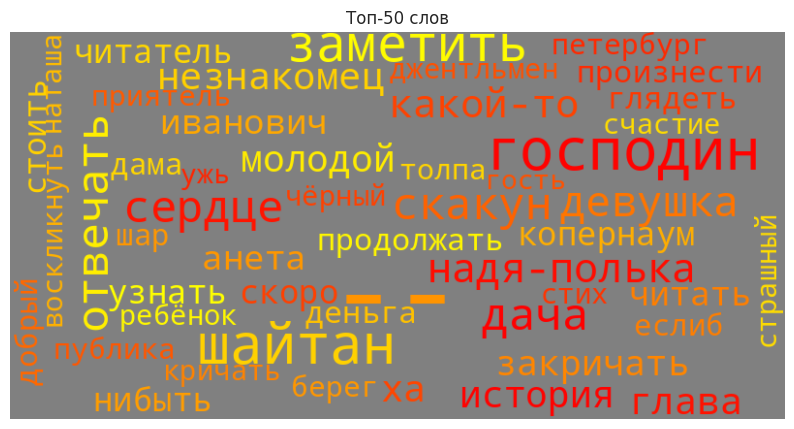

In [214]:
plot_wordcloud(dict(word_frequencies.most_common(50)), 'Топ-50 слов')

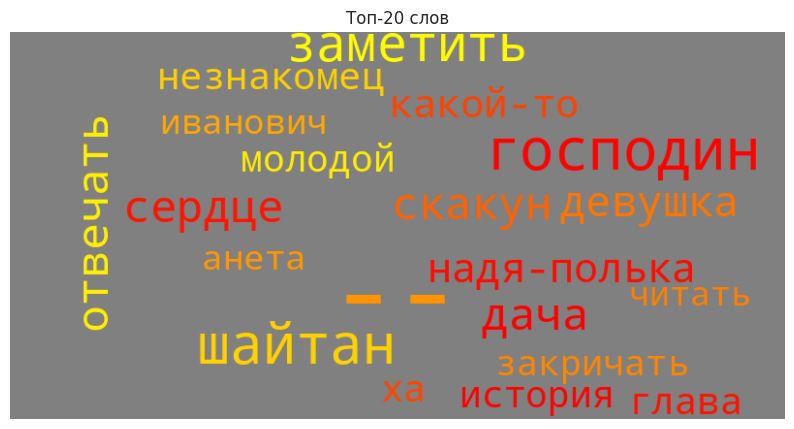

In [215]:
plot_wordcloud(dict(word_frequencies.most_common(20)), 'Топ-20 слов')

Интересно, что шайтан входит в топ-20 слов

Теперь посмотрим существительные:

In [216]:
list_of_nouns = [morph.parse(token)[0].normal_form for token in text_no_stop
                        if morph.parse(token)[0].tag.POS == 'NOUN']

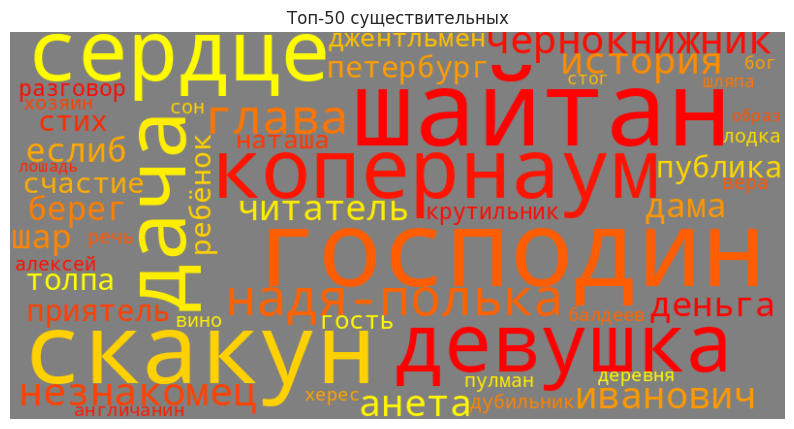

In [217]:
wf_nouns = FreqDist(list_of_nouns)
plot_wordcloud(dict(wf_nouns.most_common(50)), 'Топ-50 существительных')

Посмотрим на прилагательные и галголы в различных формах:

In [218]:
text_no_stop_initial = [token for token in text_no_punkt.split() if token not in stopwords]

In [219]:
past = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'past']
present = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'pres']
future = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'futr']


masc = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'masc']
fem = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'femn']
neu = [morph.parse(token)[0].word for token in ' '.join(text_no_stop_initial).split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'neut']

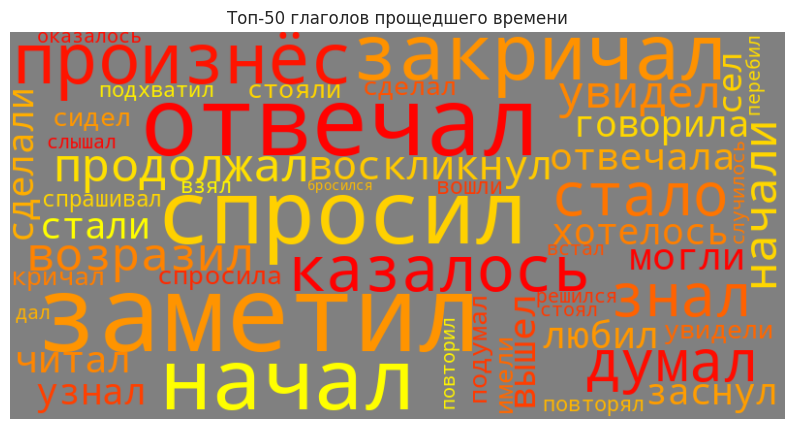

In [220]:
wf_past = FreqDist(past)
plot_wordcloud(dict(wf_past.most_common(50)), 'Топ-50 глаголов прощедшего времени')

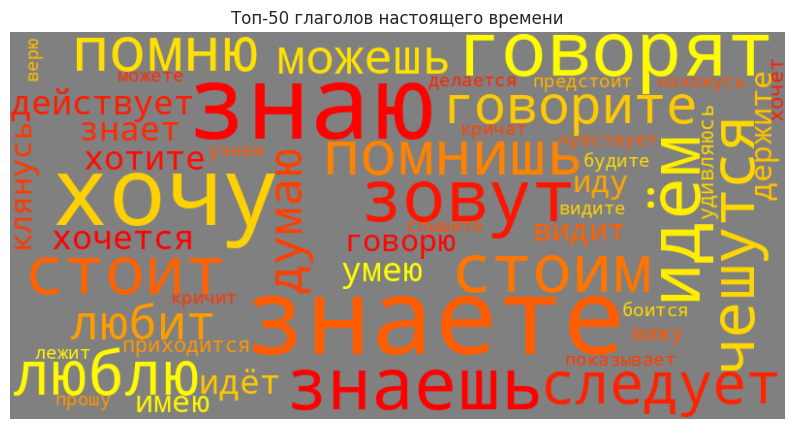

In [221]:
wf_present = FreqDist(present)
plot_wordcloud(dict(wf_present.most_common(50)), 'Топ-50 глаголов настоящего времени')

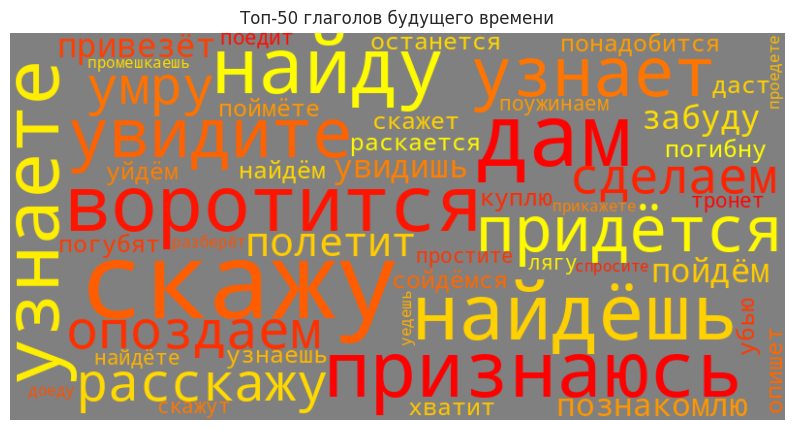

In [222]:
wf_future = FreqDist(future)
plot_wordcloud(dict(wf_future.most_common(50)), 'Топ-50 глаголов будущего времени')

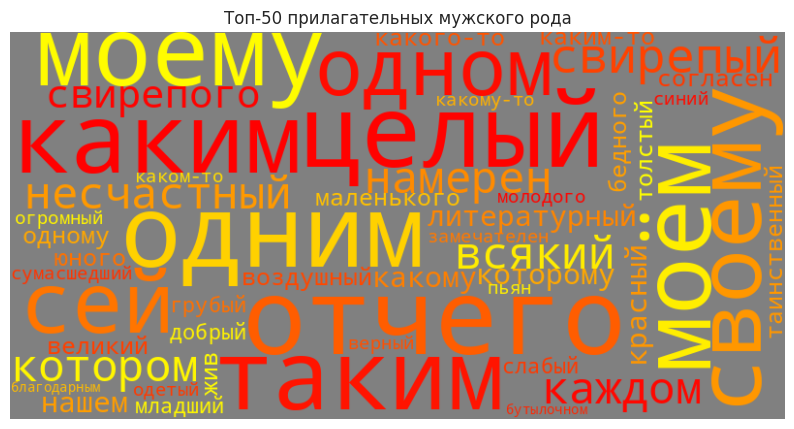

In [223]:
wf_masc = FreqDist(masc)
plot_wordcloud(dict(wf_masc.most_common(50)), 'Топ-50 прилагательных мужского рода')

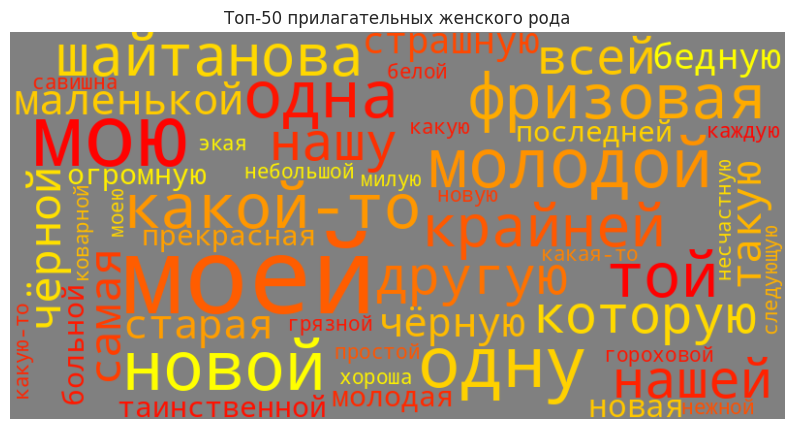

In [224]:
wf_fem = FreqDist(fem)
plot_wordcloud(dict(wf_fem.most_common(50)), 'Топ-50 прилагательных женского рода')

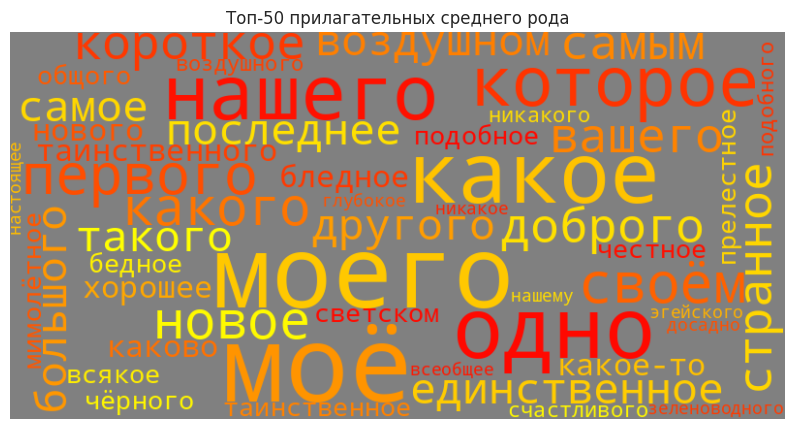

In [225]:
wf_neu = FreqDist(neu)
plot_wordcloud(dict(wf_neu.most_common(50)), 'Топ-50 прилагательных среднего рода')

Больше статистики богу статистики, поэтому посмотрим на количество разных частей речи, ttr, и еще разобьем текст на главы

In [226]:
text_final = [word for word in text_no_punkt.split()]
text_final = ' '.join([token for token in text_final if token not in stopwords])

# Делим на главы:
text_final = re.split(r'глава \w{1,4}', text_final)
print(text_final)

# Убираем пустые строки в начале списка
text_final = [chapter.strip() for chapter in text_final if chapter.strip()]
print(text_final)
print(len(text_final))

['', ' вступительная начало трудно -- слышал недель гражданин соединенных штатов собственной шкуне нечего направил какого коннектикута прямо северную пальмиру тридцать-три дня окончил путешествие бросил якорь английской набережной напрасно спутники уговаривали скорее берег невский проспект угрюмый американец пообедал шкуне говоря петербурге верно хорошого ростбифа лег спать выспавшись хорошенько пошол осматривать нашу столицу делают петербургские фельетонисты таких словах изливал дань удивления красавцу петербургу воротившись двухнедельной поездки финляндию чем-то роде австралии последняя картина стою исакиевском мосту нева спит заря небе дивный биржа адмиралтейство прекрасен спящий петербург истинно чудное описание хотелось подобно художнику фельетонисту рассказа кончил-- исакиевском мосту крайней мере троицком увы происходить мостах бросались воду подобные сцены хороши повести конце никак начале несчастию моему рассказу суждено начаться скромно прозаически -- гороховой улице тотчас п

In [227]:
lemmatized_text =[]
pos_tags_corpus_level = []

number_of_words = []
number_of_types = []

nouns = []
verbs = []
adjs = []
advs = []

past_verbs = []
present_verbs = []
future_verbs = []

adj_masc = []
adj_fem = []
adj_neut = []

for chapter in text_final:
    lemmas = [morph.parse(token)[0].normal_form for token in chapter.split()]
    pos_tags = [morph.parse(token)[0].tag.POS for token in chapter.split()]

    lemmatized_text.append(' '.join(lemmas))
    pos_tags_corpus_level.append(pos_tags)

    num_words = len(lemmas)
    num_types = len(set(lemmas))
    number_of_words.append(num_words)
    number_of_types.append(num_types)

    noun_counts = sum([1 for tag in pos_tags if tag == 'NOUN'])
    verb_counts = sum([1 for tag in pos_tags if tag == 'VERB'])
    adj_counts = sum([1 for tag in pos_tags if tag in ['ADJF', 'ADJS']])
    adv_counts = sum([1 for tag in pos_tags if tag == 'ADVB'])

    nouns.append(noun_counts)
    verbs.append(verb_counts)
    adjs.append(adj_counts)
    advs.append(adv_counts)


    past = sum([1 for token in chapter.split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'past'])
    present = sum([1 for token in chapter.split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'pres'])
    future = sum([1 for token in chapter.split() if morph.parse(token)[0].tag.POS == 'VERB' and morph.parse(token)[0].tag.tense == 'futr'])


    past_verbs.append(past)
    present_verbs.append(present)
    future_verbs.append(future)

    masc = sum([1 for token in chapter.split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'masc'])
    fem = sum([1 for token in chapter.split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'femn'])
    neu = sum([1 for token in chapter.split() if (morph.parse(token)[0].tag.POS in ['ADJF', 'ADJS']) and morph.parse(token)[0].tag.gender == 'neut'])

    adj_masc.append(masc)
    adj_fem.append(fem)
    adj_neut.append(neu)

In [228]:
import pandas as pd

In [229]:
df = pd.DataFrame({
    'original_text': text_final,
    'lemmatized_text': lemmatized_text,
    'number_of_words': [len(chapter.split()) for chapter in text_final],
    'number_of_types': [len(set(lemmas)) for lemmas in lemmatized_text],
    'nouns': nouns,
    'verbs': verbs,
    'adjectives': adjs,
    'adverbs': advs,
    'past': past_verbs,
    'present': present_verbs,
    'future': future_verbs,
    'masculinum': adj_masc,
    'femininum': adj_fem,
    'neutrum': adj_neut
})


df['type-token_ratio'] = df['number_of_types'] / df['number_of_words']
df['noun_perc'] = df['nouns'] / df['number_of_words'] * 100
df['verb_perc'] = df['verbs'] / df['number_of_words'] * 100
df['adj_perc'] = df['adjectives'] / df['number_of_words'] * 100
df['adv_perc'] = df['adverbs'] / df['number_of_words'] * 100

df

,original_text,lemmatized_text,number_of_words,number_of_types,nouns,verbs,adjectives,adverbs,past,present,future,masculinum,femininum,neutrum,type-token_ratio,noun_perc,verb_perc,adj_perc,adv_perc
0,вступительная начало трудно -- слышал недель г...,вступительный начало трудно -- слышать неделя ...,374,34,152,67,58,20,39,6,13,20,15,10,0.090909,40.641711,17.914439,15.508021,5.347594
1,причины путешествія краткій разговоръ съ приви...,причина путешествіть краткіть разговоръ съ при...,583,37,238,98,141,26,79,11,4,38,38,30,0.063465,40.823328,16.809605,24.185249,4.459691
2,новая деревня дачникъ шайтановъ эпиграфа приис...,новый деревня дачникъ шайтановъ эпиграф прииск...,648,35,261,132,117,28,83,31,9,49,23,18,0.054012,40.277778,20.370370,18.055556,4.320988
3,исторія сапогахъ пойманныхъ удочку беги беги з...,исторіть сапогахъ пойманныхъ удочка бежать беж...,391,36,151,104,60,12,59,32,8,11,23,6,0.092072,38.618926,26.598465,15.345269,3.069054
4,бритіе бороды свирѣпый господинъ въ цырульнѣ в...,бриті борода свирѣпый господинъ въ цырульнѣ вп...,535,38,193,118,63,36,70,23,18,28,16,12,0.071028,36.074766,22.056075,11.775701,6.728972
5,эвтерпино угощеніе праздникъ вѣчно юной киприд...,эвтерпино угощені праздникъ вѣчный юный киприд...,363,39,156,60,64,27,46,10,2,15,18,10,0.107438,42.975207,16.528926,17.630854,7.438017
6,продолженіе главы въ которомъ рѣшается участь ...,продолжені глава въ которомъ рѣшаться участь м...,581,37,230,133,103,31,90,21,18,19,37,19,0.063683,39.586919,22.891566,17.728055,5.335628
7,литературный вечеръ чорной рѣчкѣ -- дядюшка --...,литературный вечеръ чорной рѣчкѣ -- дядюшка --...,706,36,299,126,132,44,77,33,12,47,29,22,0.050992,42.351275,17.847025,18.696884,6.232295
8,опыты девятилѣтней музы удивительный крошка по...,опыт девятилѣтный муза удивительный крошка под...,742,43,293,141,118,41,96,29,7,45,29,23,0.057951,39.487871,19.002695,15.902965,5.525606
9,сонъ въ зимнюю фантастическая повѣсть льва бал...,сонъ въ зимний фантастический повѣсть лев балд...,720,36,308,172,107,43,120,44,5,34,41,18,0.050000,42.777778,23.888889,14.861111,5.972222


Посмотрим распределение частотных слов по главам книги:

In [230]:
def word_chunk_counter(data, word_s):
    word_in_chapter = []
    for chapter in data:
        counter = 0
        chapter_tok = chapter.split()
        for word in chapter_tok:
            if word == str(word_s):
                counter += 1
        word_in_chapter.append(counter)
    return word_in_chapter

In [231]:
heart = word_chunk_counter(lemmatized_text, 'сердце')
mister = word_chunk_counter(lemmatized_text, 'господин')
natasha = word_chunk_counter(lemmatized_text, 'наташа')
dacha = word_chunk_counter(lemmatized_text, 'дача')
kopernaum = word_chunk_counter(lemmatized_text, 'копернаум')
aneta = word_chunk_counter(lemmatized_text, 'анета')
child = word_chunk_counter(lemmatized_text, 'ребёнок')
nadya = word_chunk_counter(lemmatized_text, 'надя-полька')
alexey = word_chunk_counter(lemmatized_text, 'алексей')
devil = word_chunk_counter(lemmatized_text, 'шайтан')

In [232]:
all_words = [heart, mister, natasha, dacha, kopernaum, aneta, child, nadya, alexey, devil]

In [233]:
import seaborn as sns

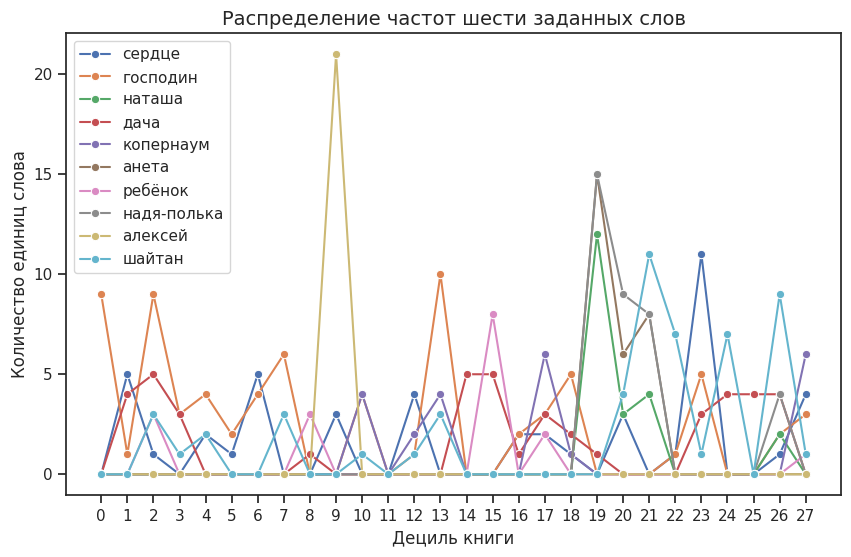

In [234]:
x = range(len(all_words[0])) # ось Х одинакова для всех линий
line_names = ['сердце', 'господин', 'наташа', 'дача', 'копернаум', 'анета', 'ребёнок', 'надя-полька', 'алексей', 'шайтан']
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks")


for i, line_data in enumerate(all_words):
    sns.lineplot(x=x, y=line_data, label=line_names[i], marker='o')

plt.xlabel("Дециль книги", fontsize=12)
plt.ylabel("Количество единиц слова", fontsize=12)
plt.title("Распределение частот шести заданных слов", fontsize=14)
plt.legend() # показываем легенду
plt.xticks(range(len(lemmatized_text)))
plt.show()

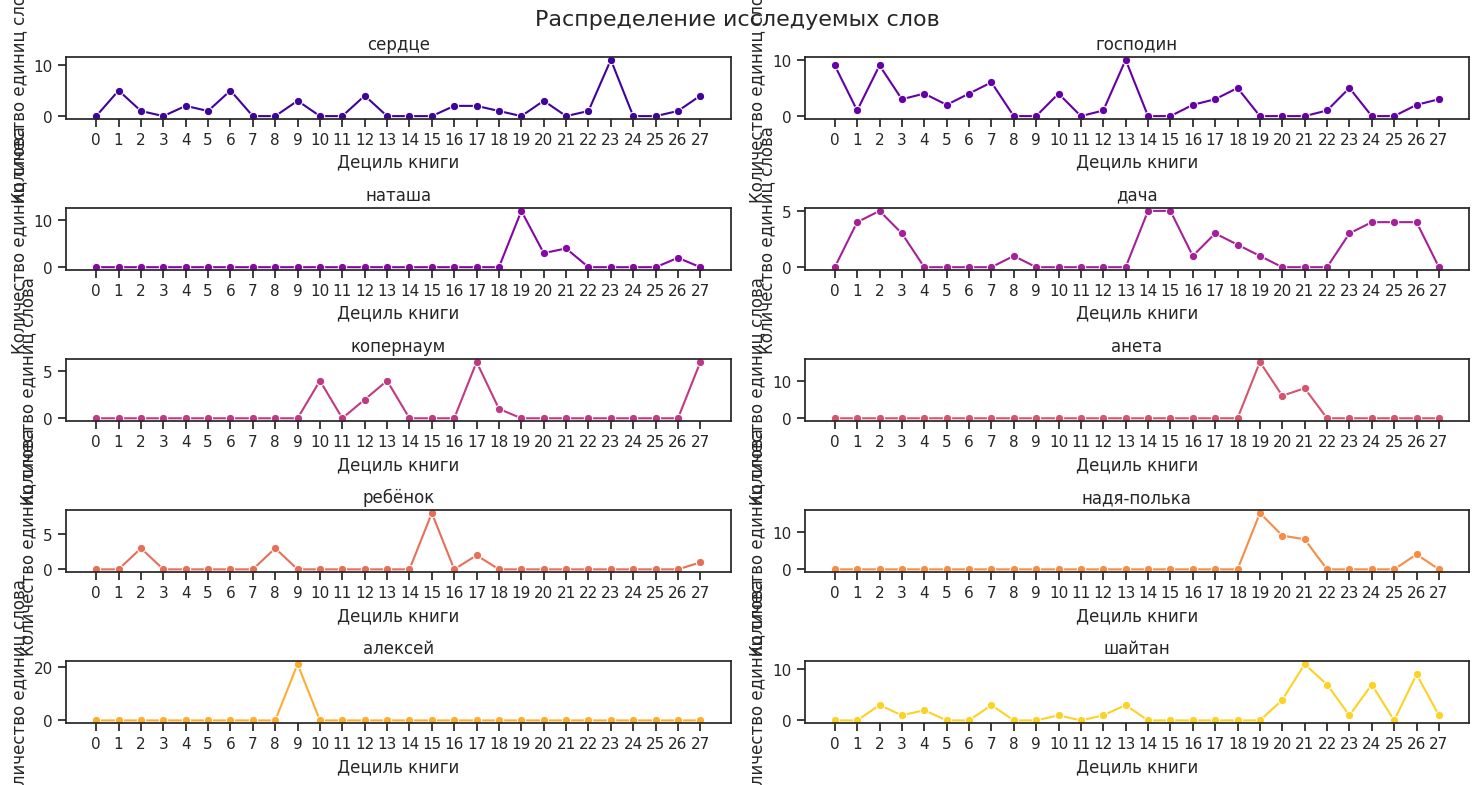

In [235]:
x = range(len(all_words[0]))
line_names = ['сердце', 'господин', 'наташа', 'дача', 'копернаум', 'анета', 'ребёнок', 'надя-полька', 'алексей', 'шайтан']
fig, axes = plt.subplots(5, 2, figsize=(15, 8))
axes = axes.flatten()

sns.set_theme(style="ticks")
colors = sns.color_palette("plasma", len(all_words))

for i, line_data in enumerate(all_words):
    ax = axes[i]
    sns.lineplot(x=x, y=line_data, marker='o', ax=ax, color=colors[i])
    ax.set_title(line_names[i])
    ax.set_xlabel("Дециль книги")
    ax.set_ylabel("Количество единиц слова")
    ax.set_xticks(range(len(lemmatized_text)))

plt.tight_layout()
plt.suptitle("Распределение исследуемых слов", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

Добавим глаголов и прилагательных: (ну и существительные)

In [236]:
cry = word_chunk_counter(lemmatized_text, 'закричать')
read = word_chunk_counter(lemmatized_text, 'читать')
petersburg = word_chunk_counter(lemmatized_text, 'петербург')
confess = word_chunk_counter(lemmatized_text, 'признаться')
oppose = word_chunk_counter(lemmatized_text, 'возразить')
young = word_chunk_counter(lemmatized_text, 'молодой')
ivanovich = word_chunk_counter(lemmatized_text, 'иванович')
happiness = word_chunk_counter(lemmatized_text, 'счастие')
warlock = word_chunk_counter(lemmatized_text, 'чернокнижник')
money = word_chunk_counter(lemmatized_text, 'деньга')

In [237]:
all_words = [cry, read, petersburg, confess, oppose, young, ivanovich, happiness, warlock, money]

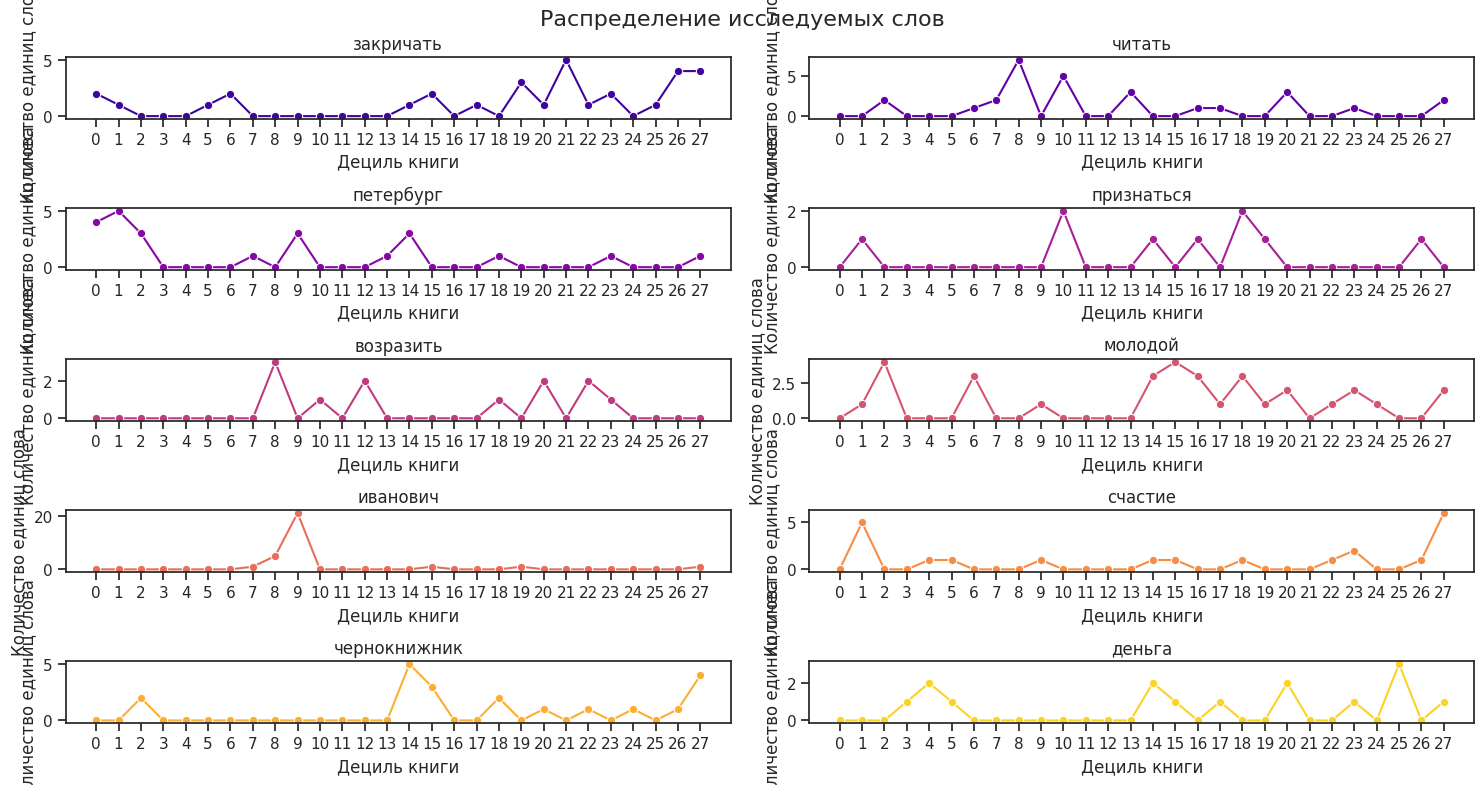

In [238]:
x = range(len(all_words[0]))
line_names = ['закричать', 'читать', 'петербург', 'признаться', 'возразить', 'молодой', 'иванович', 'счастие', 'чернокнижник', 'деньга']
fig, axes = plt.subplots(5, 2, figsize=(15, 8))
axes = axes.flatten()

sns.set_theme(style="ticks")
colors = sns.color_palette("plasma", len(all_words))

for i, line_data in enumerate(all_words):
    ax = axes[i]
    sns.lineplot(x=x, y=line_data, marker='o', ax=ax, color=colors[i])
    ax.set_title(line_names[i])
    ax.set_xlabel("Дециль книги")
    ax.set_ylabel("Количество единиц слова")
    ax.set_xticks(range(len(lemmatized_text)))

plt.tight_layout()
plt.suptitle("Распределение исследуемых слов", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

## Теперь посмотрим на коллокации

In [239]:
from nltk.collocations import *

In [240]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [241]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(' '.join(lemmatized_text)))

In [242]:
finder_trig = TrigramCollocationFinder.from_words(word_tokenize(' '.join(lemmatized_text)))

In [243]:
finder_big.nbest(bigram_measures.raw_freq, 50)

[('--', '--'),
 ('ха', 'ха'),
 ('алексей', 'иванович'),
 ('--', 'знать'),
 ('шайтан', '--'),
 ('надя-полька', '--'),
 ('шайтанов', '--'),
 ('наталья', 'николаевич'),
 ('--', 'какой'),
 ('--', 'господин'),
 ('--', 'хотеть'),
 ('--', 'говорить'),
 ('--', 'ужь'),
 ('анета', '--'),
 ('новый', 'деревня'),
 ('фризовый', 'шинель'),
 ('я', '--'),
 ('--', 'сказать'),
 ('воздушный', 'шар'),
 ('девушка', '--'),
 ('джентльмен', '--'),
 ('мой', 'сердце'),
 ('незнакомец', '--'),
 ('пулман', '--'),
 ('скакун', '--'),
 ('--', 'видеть'),
 ('--', 'думать'),
 ('--', 'спросить'),
 ('--', 'стоить'),
 ('вода', '--'),
 ('голос', '--'),
 ('копернаумов', '--'),
 ('крайний', 'мера'),
 ('минеральный', 'вода'),
 ('--', 'ах'),
 ('--', 'идти'),
 ('анна', 'крутильников'),
 ('балдеев', '--'),
 ('господин', '--'),
 ('господин', 'альмавива'),
 ('дормидон', 'филипович'),
 ('заметить', 'скакун'),
 ('пятьдесят', 'целковый'),
 ('человек', '--'),
 ('--', 'один'),
 ('--', 'полнота'),
 ('--', 'сделать'),
 ('заметить', 'шайтан

In [244]:
scores = finder_big.score_ngrams(bigram_measures.chi_sq)

In [245]:
sorted_scores = sorted(scores, key=lambda score: score[1], reverse=False)

In [246]:
finder_trig.nbest(trigram_measures.pmi, 15)

[('1', 'спб', '20'),
 ('andiam', 'salviam', 'вильгельм'),
 ('bis', 'fora', 'разнестись'),
 ('blast', 'your', 'eyes'),
 ('comme', 'vous', 'êtez'),
 ('del', 'mortali', 'sciagurato'),
 ('est', 'baclée', 'ѣдем'),
 ('fiche', 'diceudo', 'prendi'),
 ('geworden', 'worden', 'seyn'),
 ('ich', 'werde', 'geworden'),
 ('io', 'ti', 'rivedrai'),
 ('laffaire', 'est', 'baclée'),
 ('madame', 'la', 'baronne'),
 ('mane', 'con', 'ambedue'),
 ('mortali', 'sciagurato', 'io')]